# Salary Predictions Based on Job Descriptions

# Part 1 - Exploratory Data Analysis

In [1]:
# Data Engineering Libraries
import pandas as pd
import numpy as np

# Exploratory Data Analysis and Visualization Libraries
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

__author__ = "Ushma Bhatt"

In [2]:
#load the data into a Pandas dataframe
input_train_features_df = pd.read_csv(r'data/train_features.csv')
input_train_salaries_df = pd.read_csv(r'data/train_salaries.csv')
predict_test_features_df = pd.read_csv(r'data/test_features.csv')

### ---- Print the top 5 rows of the data frames ----

In [3]:
input_train_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
input_train_salaries_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [5]:
predict_test_features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


### ---- 3 Clean the data ----

In [6]:
# Check for null values
# All numerical values have to be greater than 0

print("Checking for Null values\n\nTrain Features")
print(input_train_features_df.isnull().sum())
print("\nTrain Salaries")
print(input_train_salaries_df.isnull().sum())
print("\nTest Features")
print(predict_test_features_df.isnull().sum())

print("\n")
print("Checking for Years of Experience less than 0")
print(input_train_features_df[input_train_features_df['yearsExperience']<0])

print("\n")
print("Checking for Miles from Metropolis less than 0")
print(input_train_features_df[input_train_features_df['milesFromMetropolis']<0])

print("\n")
print("Checking for Salary less than 0")
print(input_train_salaries_df[input_train_salaries_df['salary']<=0])

Checking for Null values

Train Features
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

Train Salaries
jobId     0
salary    0
dtype: int64

Test Features
jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


Checking for Years of Experience less than 0
Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis]
Index: []


Checking for Miles from Metropolis less than 0
Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis]
Index: []


Checking for Salary less than 0
                   jobId  salary
30559   JOB1362684438246       0
495984  JOB136268

### Merge the training features and taget variable as one dataframe

In [7]:
train_df = pd.merge(input_train_features_df, input_train_salaries_df, how='outer', on=['jobId'])
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
# Drop entries with salary 0 or lesser than 0
train_df.drop(train_df[train_df['salary'] <=0].index, inplace=True)

### ---- 4 Explore the data (EDA) ----

In [9]:
#summarize the training data 
print("Numberical Features for training data\n")
print(train_df.describe())

print("\nCategorical Features for training data\n")
print(train_df.describe(include=['category','object']))

#summarize the test data 

print("\nNumberical Features for testing data\n")
print(predict_test_features_df.describe())

print("\nCategorical Features for testing data\n")
print(predict_test_features_df.describe(include=['category','object']))

#look for correlation between each feature and the target
#look for correlation between features

Numberical Features for training data

       yearsExperience  milesFromMetropolis         salary
count    999995.000000        999995.000000  999995.000000
mean         11.992407            49.529381     116.062398
std           7.212390            28.877721      38.717163
min           0.000000             0.000000      17.000000
25%           6.000000            25.000000      88.000000
50%          12.000000            50.000000     114.000000
75%          18.000000            75.000000     141.000000
max          24.000000            99.000000     301.000000

Categorical Features for training data

                   jobId companyId jobType       degree   major industry
count             999995    999995  999995       999995  999995   999995
unique            999995        63       8            5       9        7
top     JOB1362684769166    COMP39  SENIOR  HIGH_SCHOOL    NONE      WEB
freq                   1     16193  125886       236975  532353   143205

Numberical Features for

As we see there is a positive correaltion between the salary and years of experience which makes complete sense as more experienced employees are more likely to have higher salaries. 

We also notice that the salary decreases as the distance from the metropolitan areas increases - There could be multiple factors affecting this. A few of them might be cost of living decreases significantly away from the cities, land rates are lower etc.

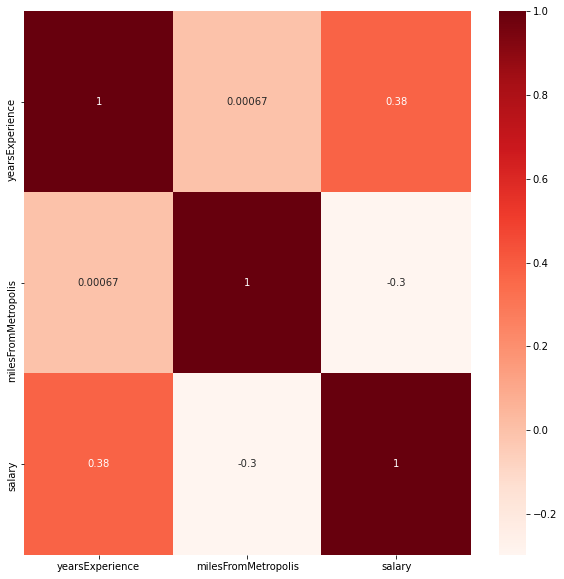

In [10]:
#numerical_col_names = ['yearsExperience','milesFromMetropolis','salary']

plt.figure(figsize=(10,10))
cor = train_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
def categorical_variables_box_plot(df,featureName,targetVariable):
    plt.figure(figsize=(10,10))
    bplot=sns.boxplot(y=targetVariable, x=featureName, 
                   data=df.sort_values(targetVariable))

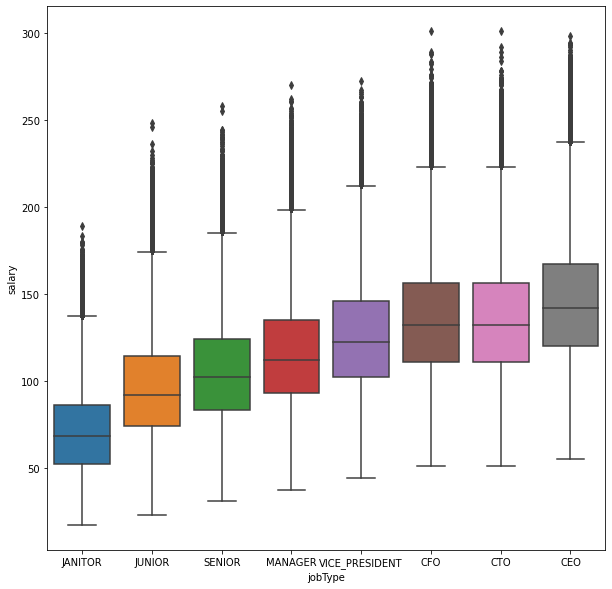

In [12]:
categorical_variables_box_plot(train_df,'jobType','salary')

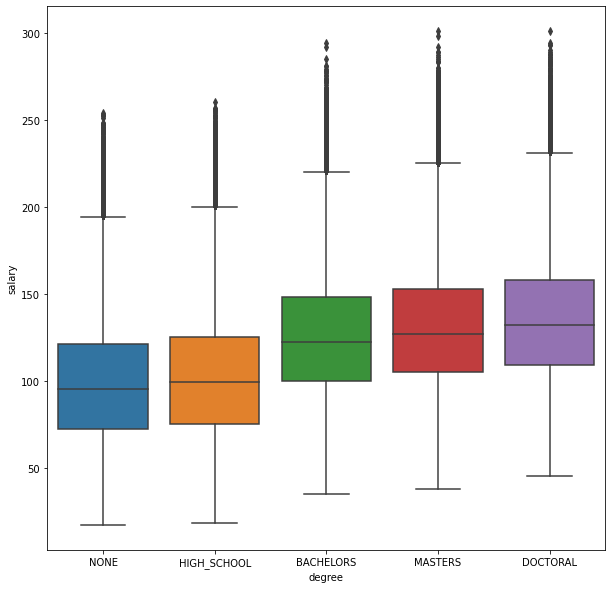

In [13]:
categorical_variables_box_plot(train_df,'degree','salary')

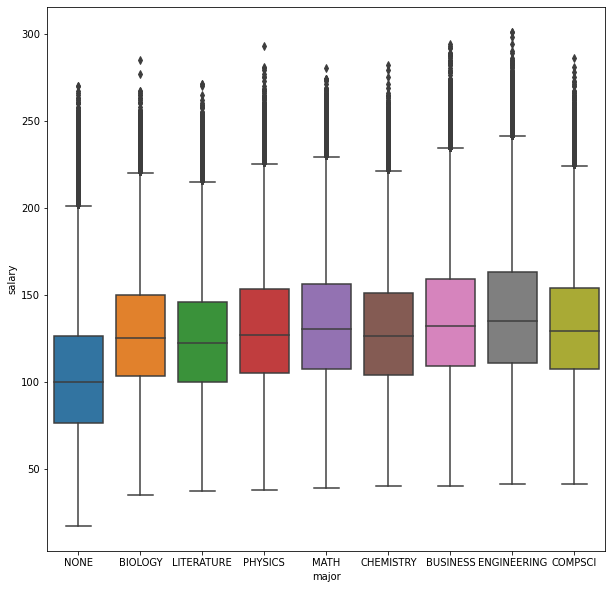

In [14]:
categorical_variables_box_plot(train_df,'major','salary')

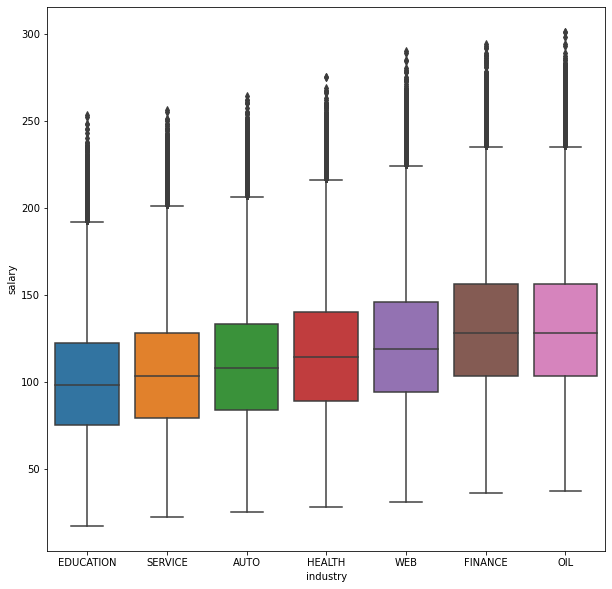

In [15]:
categorical_variables_box_plot(train_df,'industry','salary')

We see from the above box plots that Finace and Oil industries pay a higher salary to their employees. Let us analyze further the Job types and the how they compare to the others

### Visualize the target variable - Salary

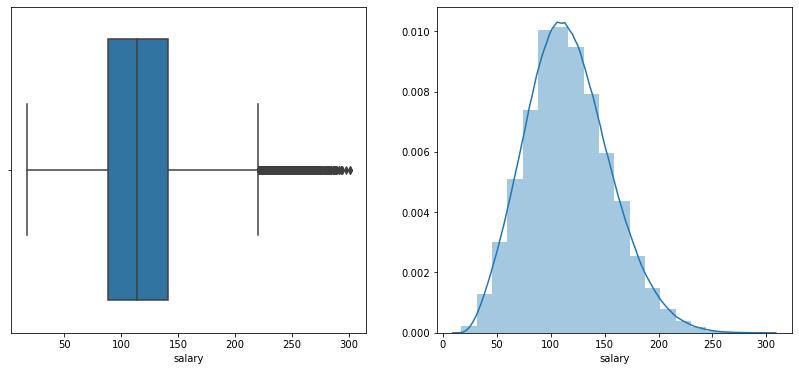

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary,bins=20)
plt.show()

### IQR to identify the outliers and examine them

In [17]:
stats = train_df.salary.describe()
print(stats)
IQR = stats['75%']-stats['25%']
upper_bound = stats['75%']+1.5*IQR
lower_bound = stats['25%']-1.5*IQR
print("The upper and lower bounds for the outliers are {} and {}.".format(upper_bound,lower_bound))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
The upper and lower bounds for the outliers are 220.5 and 8.5.


In [18]:
train_df[train_df.salary <= 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [19]:
train_df.loc[(train_df.salary > 220.5),'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [20]:
train_df[train_df.salary > 220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [21]:
df_finance_oil=train_df[(train_df['industry'] == 'FINANCE') | (train_df['industry'] == 'OIL')]
df_finance_oil.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
12,JOB1362684407699,COMP4,JUNIOR,NONE,NONE,OIL,8,29,79
13,JOB1362684407700,COMP54,JUNIOR,MASTERS,MATH,FINANCE,21,26,193
28,JOB1362684407715,COMP11,JANITOR,HIGH_SCHOOL,NONE,FINANCE,20,23,101


In [22]:
categorical_cols = ['jobType', 'degree', 'major', 'industry']

train_df[categorical_cols] = train_df[categorical_cols].astype('category')




In [23]:
train_df.dtypes

jobId                    object
companyId                object
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

In [31]:
# https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

def encode_label1(df):   
    for col in df.columns:        
        if df[col].dtype.name == "category" or "object":
            le = LabelEncoder()
            df[col]=le.fit_transform(df[col])
    return df

"""
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)
"""

"\ndef encode_label(df, col):\n    #encode the categories using average salary for each category to replace label\n    cat_dict ={}\n    cats = df[col].cat.categories.tolist()\n    for cat in cats:\n        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   \n    df[col] = df[col].map(cat_dict)\n"

In [33]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df)
        
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label1(train_df)

In [36]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,0,31,5,3,6,3,10,83,113
1,1,11,7,1,0,4,3,73,84
2,2,48,4,4,4,3,10,38,120
3,3,32,3,4,3,2,8,17,125
4,4,60,4,2,4,5,8,16,146


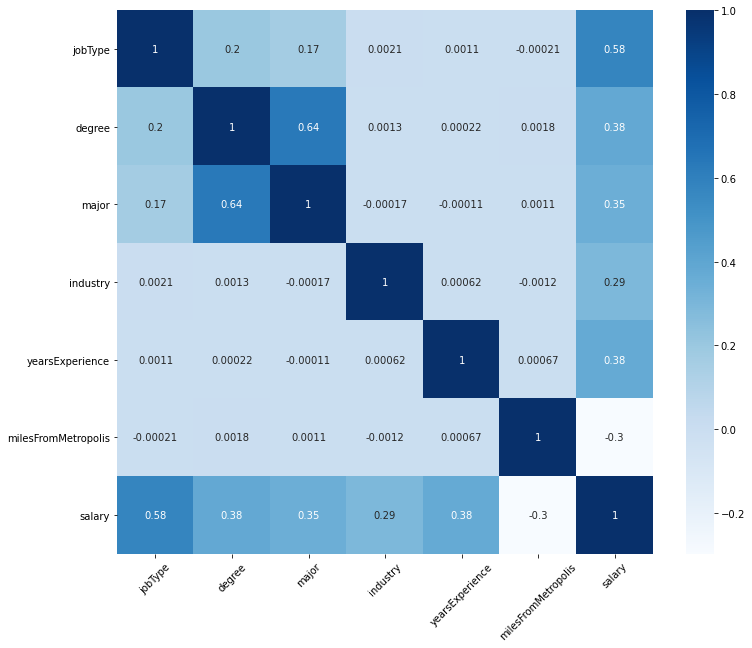

In [37]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()